[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset loaded: (2225, 2)
                                             article     label
0  China had role in Yukos split-up\n \n China le...  business
1  Oil rebounds from weather effect\n \n Oil pric...  business
2  Indonesia 'declines debt freeze'\n \n Indonesi...  business
3  $1m payoff for former Shell boss\n \n Shell is...  business
4  US bank in $515m SEC settlement\n \n Five Bank...  business
✅ Accuracy: 0.9662921348314607

🔍 Classification Report:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       115
entertainment       0.97      0.93      0.95        72
     politics       0.92      1.00      0.96        76
        sport       0.98      1.00      0.99       102
         tech       0.97      0.94      0.96        80

     accuracy                           0.97       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.97      0.97      0.97       445



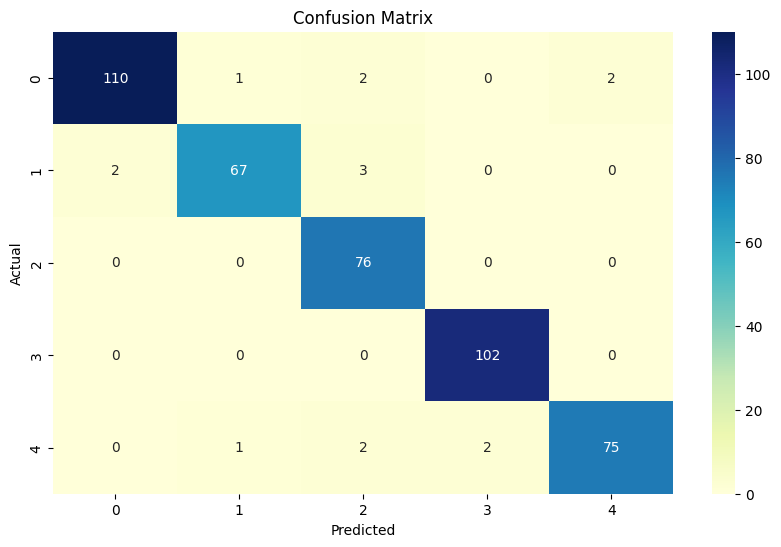


🔎 Enter a news article (or type 'exit' to quit):
 honda


📌 Predicted Category: sport



🔎 Enter a news article (or type 'exit' to quit):
 home


📌 Predicted Category: politics


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Download NLTK Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 3: Load Dataset
df = pd.read_csv('fakenewclassification.csv', encoding='latin1', header=0)
df = df[['article', 'label']]  # ✅ Use correct column names
df.dropna(inplace=True)
print("✅ Dataset loaded:", df.shape)
print(df.head())

# Step 4: Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['article'].apply(clean_text)

# Step 5: Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Prediction and Evaluation
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Function to Predict User Input
def predict_category(text_input):
    cleaned = clean_text(text_input)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# Step 11: User Input Loop
while True:
    user_input = input("\n🔎 Enter a news article (or type 'exit' to quit):\n")
    if user_input.lower() == 'exit':
        print("👋 Exiting...")
        break
    prediction = predict_category(user_input)
    print("📌 Predicted Category:", prediction)
